In [2]:
import matplotlib.pyplot as plt

from read_data import *
from changepoint_detection import *
from eigen_freq import *

In [3]:
data = process_data()

In [4]:
data['V25a_001']['dat']

,CH1_Moment,CH2_Kraft,CH3_SyncSig,CH4_akustik,CH5_a1_WSAS,CH6_a2_WSAF,CH7_a3_BOZA,time
0,4.1140,-461.496,10.6336,0.022530,-4.6096,-0.4592,0.89,0.00000
1,-3.6784,-417.872,10.6256,0.178658,-8.6504,2.7240,3.97,0.00005
2,-11.5676,409.836,10.6184,0.351386,-8.2272,3.5736,2.66,0.00010
3,5.4208,79.212,10.6160,0.456525,-3.8648,2.5392,0.65,0.00015
4,5.3240,182.532,10.6192,0.251385,-6.2424,0.3528,-1.54,0.00020
...,...,...,...,...,...,...,...,...
5457650,6.9212,-439.684,10.6176,0.040317,0.1928,0.5392,-2.18,272.88250
5457651,6.7276,-546.448,10.6160,0.014625,0.1680,0.1096,0.20,272.88255
5457652,6.8244,-584.332,10.6096,-0.003953,0.0056,-0.0608,-0.43,272.88260
5457653,3.9688,-634.844,10.6168,-0.011067,-0.1888,-0.1720,-4.88,272.88265


## Detect the Eigen frequencies for the V24, V25, V20 datasets

In [11]:
datasets = [
            'V24_0001',
            'V25a_001',
            'V6_00001',
        ]
selected_sensors = ["CH1_Moment"]
changepoints = generate_changepoints(data, selected_sensors)

/Users/aymanehachcham/miniconda3/envs/tad/lib/python3.10/site-packages/ruptures/costs/costnormal.py:27: UserWarning: New behaviour in v1.1.5: a small bias is added to the covariance matrix to cope with truly constant segments (see PR#198).
  warnings.warn(


/var/folders/kl/77dw97d55y1_kplchw9htctc0000gn/T/ipykernel_49301/3153714923.py:4: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  vibrations_af = data['V6_00001']['dat']['CH1_Moment'].loc[cpt_indexes[3]:][0:50000]
/var/folders/kl/77dw97d55y1_kplchw9htctc0000gn/T/ipykernel_49301/3153714923.py:7: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  time_af = data['V6_00001']['dat']['time'].loc[cpt_indexes[3]:][0:50000]


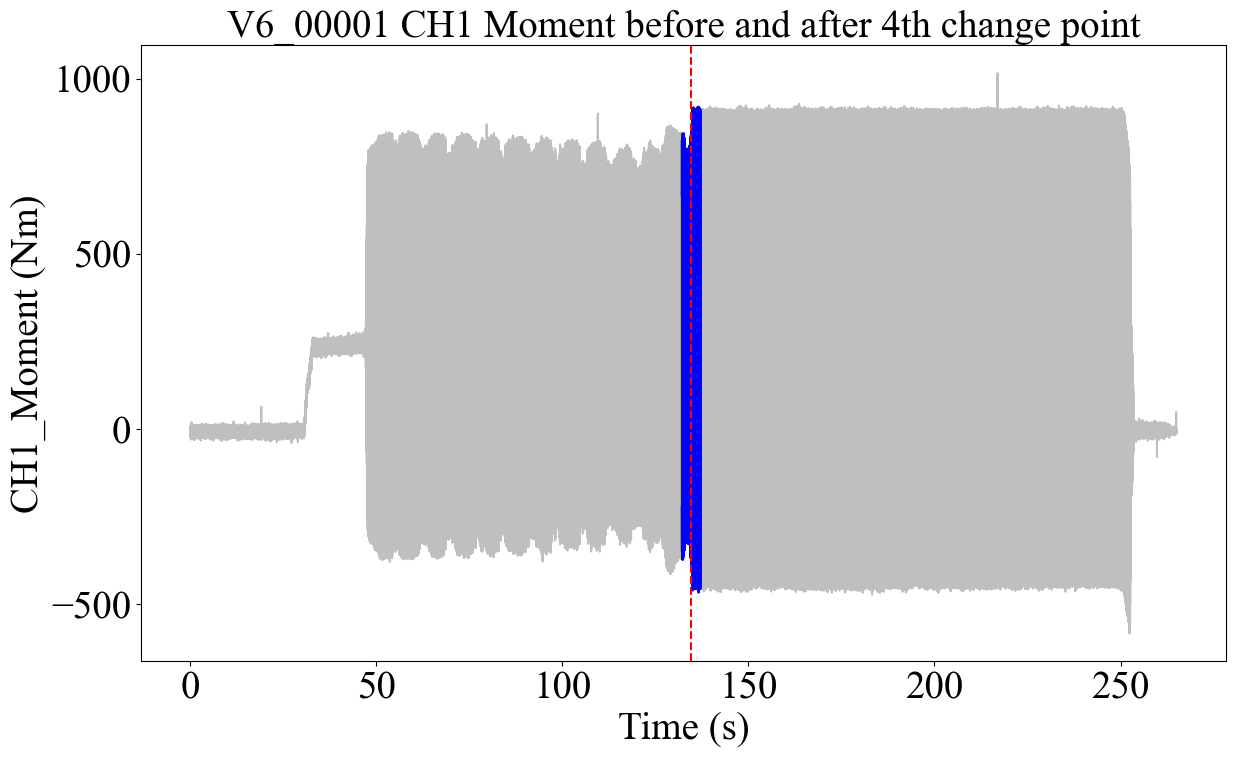

In [17]:
# plot 40k observations before and after the 4th change point for V20_0001:
cpt_indexes = changepoints['V6_00001']['CH1_Moment']['indexes']
vibrations_bf = data['V6_00001']['dat']['CH1_Moment'].loc[:cpt_indexes[3]][-50000:]
vibrations_af = data['V6_00001']['dat']['CH1_Moment'].loc[cpt_indexes[3]:][0:50000]

time_bf = data['V6_00001']['dat']['time'].loc[:cpt_indexes[3]][-50000:]
time_af = data['V6_00001']['dat']['time'].loc[cpt_indexes[3]:][0:50000]

# concatenate the data before and after the change point:
data_bf_af = np.concatenate((vibrations_bf.values.reshape(-1), vibrations_af.values.reshape(-1)))
time_bf_af = np.concatenate((time_bf.values.reshape(-1), time_af.values.reshape(-1)))

# plot the observations before and after the change point on top of the original time series:
fig, ax = plt.subplots(figsize=(14, 8))
ax.plot(data['V6_00001']['dat']['time'], data['V6_00001']['dat']['CH1_Moment'], color='gray', alpha=0.5)
ax.plot(time_bf_af, data_bf_af, color='blue')
ax.set_xlabel('Time (s)', fontsize=28)
ax.set_ylabel('CH1_Moment (Nm)', fontsize=28)
ax.set_title('V6_00001 CH1 Moment before and after 4th change point', fontsize=28)
# increase a lot the label size:
plt.tick_params(axis='both', which='major', labelsize=28)

# add the red vertical line to indicate the change point:
ax.axvline(x=time_bf_af[-50000], color='red', linestyle='--')

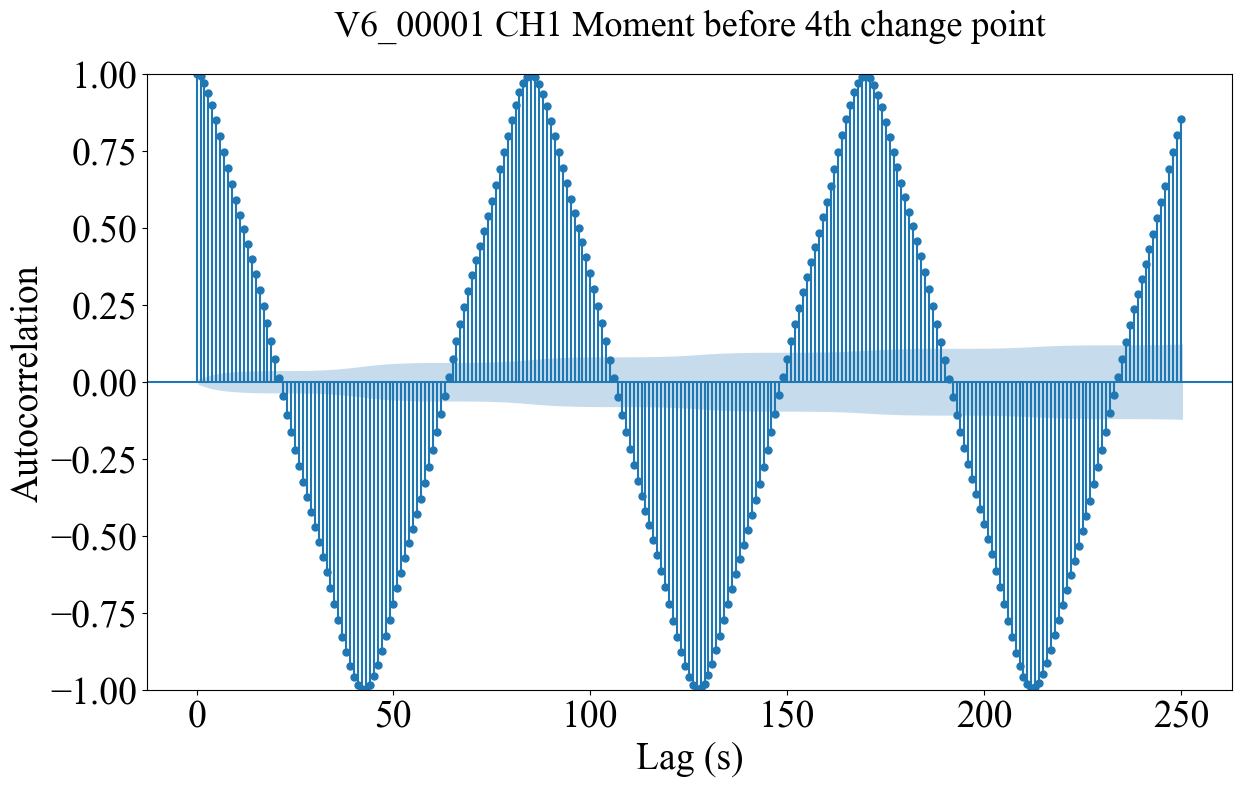

In [19]:
# We study the ACF function for those 50k sampled observations:
from statsmodels.graphics.tsaplots import plot_acf

# change the figure size:
plt.rcParams['figure.figsize'] = [14, 8]

# Plot the autocorrelation function
plot_acf(vibrations_af, lags=250)

# labels:
plt.xlabel('Lag (s)', fontsize=27)
plt.ylabel('Autocorrelation', fontsize=27)

# increase a lot the label size:
plt.tick_params(axis='both', which='major', labelsize=27)

# title
plt.title('V6_00001 CH1 Moment before 4th change point', fontsize=26, pad=28)

# Show the plot
plt.show()

In [5]:
# For damped experiments:
data_d_sets = [
            'D0400001',
            'D0600001',
            'D0800001',
        ]
selected_sensors = ["CH1_Moment"]
changepoints_d = generate_changepoints(data, selected_sensors)

first_cp = changepoints_d['D0400001']['CH1_Moment']['change_points'].iloc[0]
second_cp = changepoints_d['D0400001']['CH1_Moment']['change_points'].iloc[1]

# give back the value for CH1 Moment when time = first_cp
df = data['D0400001']['dat'][['CH1_Moment', 'time']]
values_analyse = df[(df['time'] >= first_cp) & (df['time'] <= second_cp)]

/Users/aymanehachcham/miniconda3/envs/tad/lib/python3.10/site-packages/ruptures/costs/costnormal.py:27: UserWarning: New behaviour in v1.1.5: a small bias is added to the covariance matrix to cope with truly constant segments (see PR#198).
  warnings.warn(


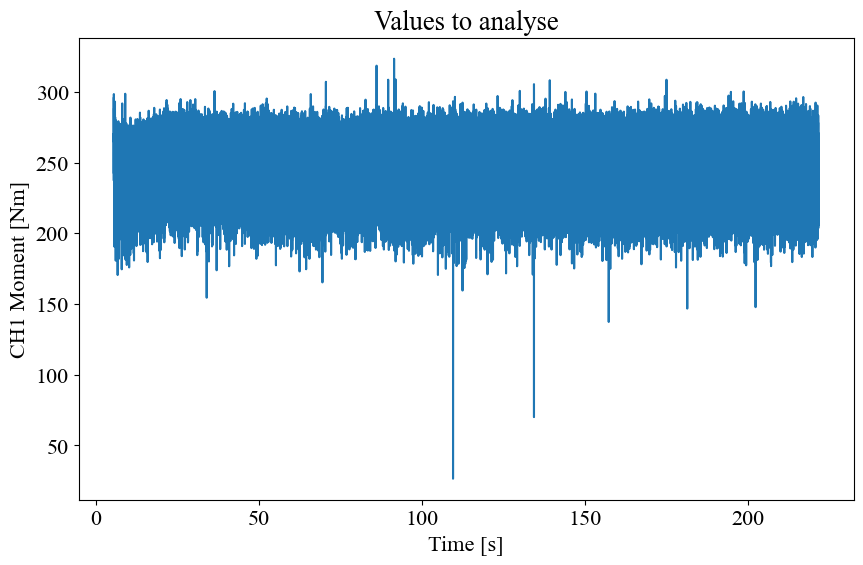

In [6]:
# plot the values:
plt.figure(figsize=(10,6))
plt.plot(values_analyse['time'], values_analyse['CH1_Moment'])
plt.xlabel("Time [s]")
plt.ylabel("CH1 Moment [Nm]")
plt.title("Values to analyse")
plt.show()

/var/folders/kl/77dw97d55y1_kplchw9htctc0000gn/T/ipykernel_49301/3173148941.py:8: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  plot_acf(values_analyse['CH1_Moment'][100000:200000], lags=20)


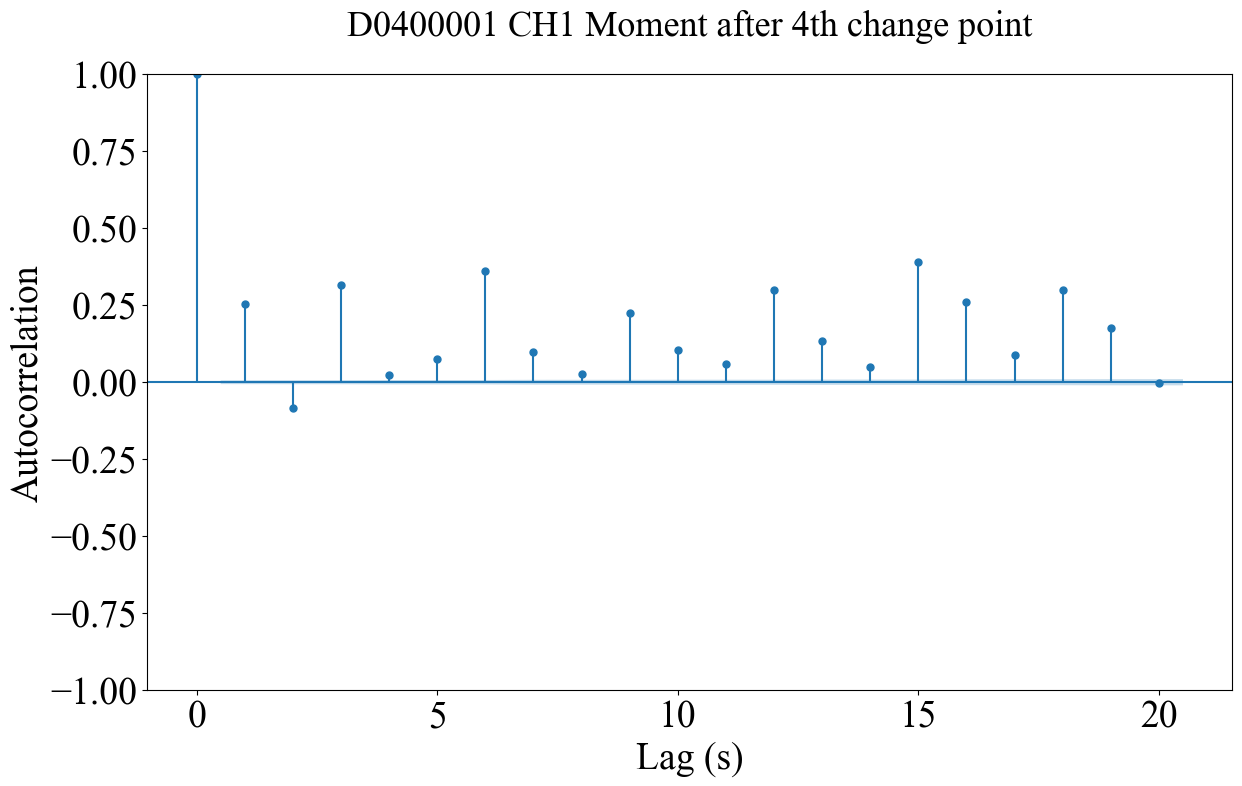

In [10]:
# We study the ACF function for those 50k sampled observations:
from statsmodels.graphics.tsaplots import plot_acf

# change the figure size:
plt.rcParams['figure.figsize'] = [14, 8]

# Plot the autocorrelation function
plot_acf(values_analyse['CH1_Moment'][100000:200000], lags=20)

# labels:
plt.xlabel('Lag (s)', fontsize=27)
plt.ylabel('Autocorrelation', fontsize=27)

# increase a lot the label size:
plt.tick_params(axis='both', which='major', labelsize=27)

# title
plt.title('D0400001 CH1 Moment after 4th change point', fontsize=26, pad=28)

# Show the plot
plt.show()

### Generate spectrograms for the V24 CH1 Moment before and after 4th change point

In [11]:
experiments = [
            'V10_0001',
            'V2_00001',
            'V20_0001',
            'V24_0001',
            'V25a_001',
            'V6_00001',
            'V17_0001'
        ]
selected_sensors = ["CH1_Moment"]
cpts = generate_changepoints(data, selected_sensors)

/Users/aymanehachcham/miniconda3/envs/tad/lib/python3.10/site-packages/ruptures/costs/costnormal.py:27: UserWarning: New behaviour in v1.1.5: a small bias is added to the covariance matrix to cope with truly constant segments (see PR#198).
  warnings.warn(


In [75]:
cpt_indexes = cpts['V10_0001']['CH1_Moment']['indexes']
vibrations_bf = data['V10_0001']['dat']['CH1_Moment'].loc[:cpt_indexes[2]][-50000:]
vibrations_af = data['V10_0001']['dat']['CH1_Moment'].loc[cpt_indexes[2]:][0:50000]
time_bf = data['V10_0001']['dat']['time'].loc[:cpt_indexes[2]][-50000:]
time_af = data['V10_0001']['dat']['time'].loc[cpt_indexes[2]:][0:50000]

# concatenate the data before and after the change point:
data_bf_af = np.concatenate((vibrations_bf.values.reshape(-1), vibrations_af.values.reshape(-1)))
time_bf_af = np.concatenate((time_bf.values.reshape(-1), time_af.values.reshape(-1)))

# create a dataframe with the data:
df = pd.DataFrame({'time': time_bf_af, 'vibrations': data_bf_af})
df

/var/folders/kl/77dw97d55y1_kplchw9htctc0000gn/T/ipykernel_17547/1869410860.py:3: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  vibrations_af = data['V10_0001']['dat']['CH1_Moment'].loc[cpt_indexes[2]:][0:50000]
/var/folders/kl/77dw97d55y1_kplchw9htctc0000gn/T/ipykernel_17547/1869410860.py:5: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  time_af = data['V10_0001']['dat']['time'].loc[cpt_indexes[2]:][0:50000]


,time,vibrations
0,44.00100,242.2420
1,44.00105,243.1616
2,44.00110,240.9836
3,44.00115,239.4832
4,44.00120,239.5316
...,...,...
99995,49.00070,702.7196
99996,49.00075,598.1272
99997,49.00080,440.0044
99998,49.00085,263.2960


## Rolling variance

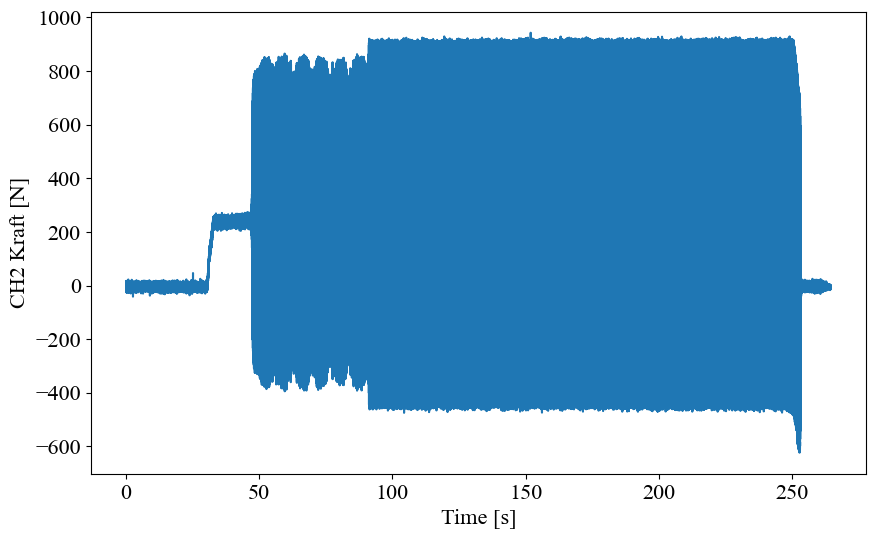

In [64]:
# plot the data:
plt.figure(figsize=(10,6))
plt.plot(data['V10_0001']['dat']['time'], data['V10_0001']['dat']['CH1_Moment'])
plt.xlabel("Time [s]")
plt.ylabel("CH2 Kraft [N]")
plt.show()

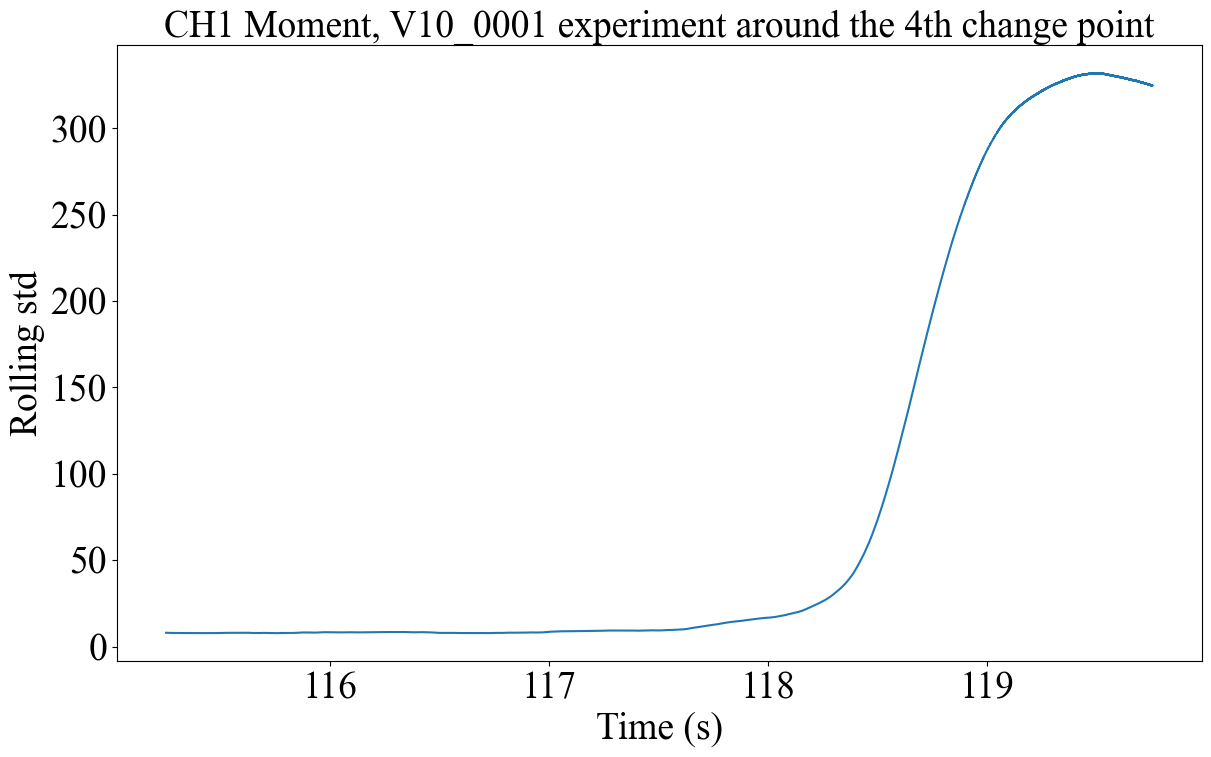

In [67]:
# Set the window size and threshold value
window_size = 10000
threshold = 150_000
values = df['vibrations']
time = df['time']

# Compute the rolling variance of the time series
rolling_var = values.rolling(window_size).std()

# Find the time points where the rolling variance exceeds the threshold value
# anomalies = np.where(rolling_var > threshold)[0]

# Create a time series plot with the rolling variance overlaid
fig, ax = plt.subplots(figsize=(14, 8))
# ax.plot(time, values, label='Time series')
ax.plot(time, rolling_var, label=f'Rolling variance (window size={window_size})')

# # Plot vertical lines at the anomaly time points
# for anomaly in anomalies:
#     ax.axvline(x=time[anomaly], color='red')

# Add a legend and axis labels
ax.set_xlabel('Time (s)', fontsize=27)
ax.set_ylabel('Rolling std', fontsize=27)
ax.set_title('CH1 Moment, V10_0001 experiment around the 4th change point', fontsize=27)

# increase a lot the label size:
plt.tick_params(axis='both', which='major', labelsize=27)

# Show the plot
plt.show()

KeyError: -1

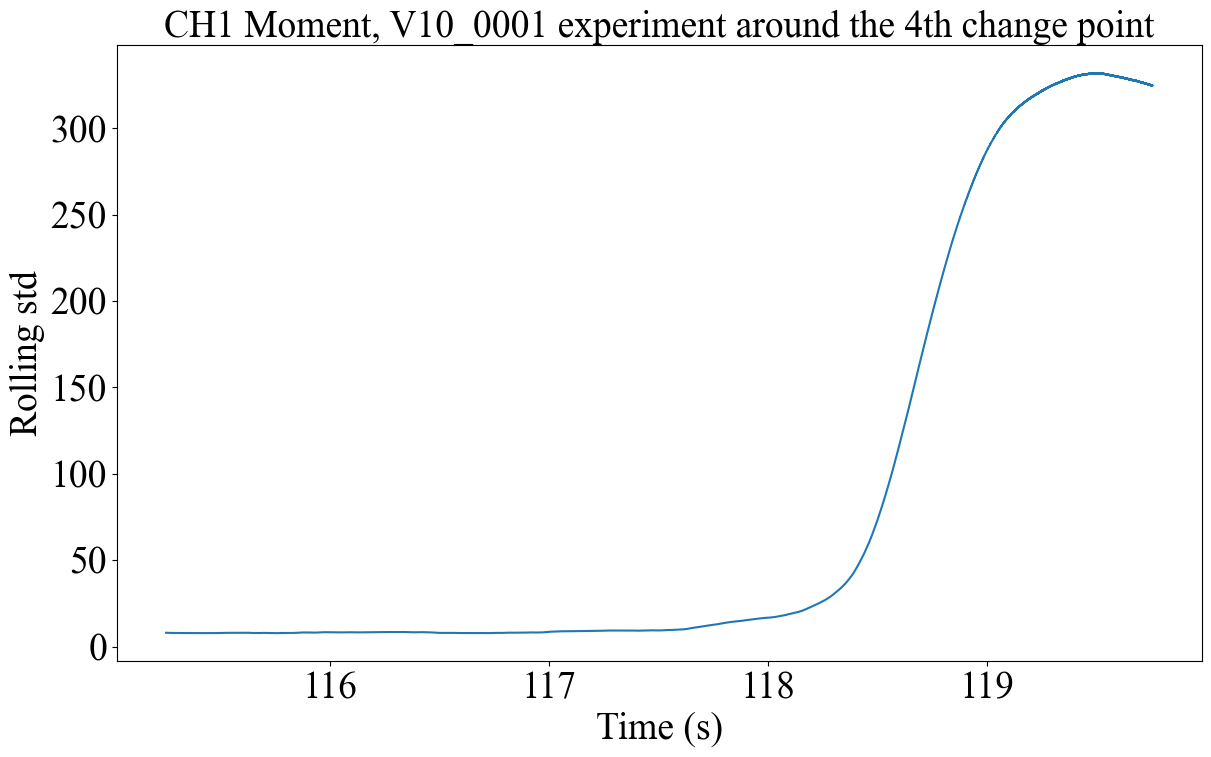

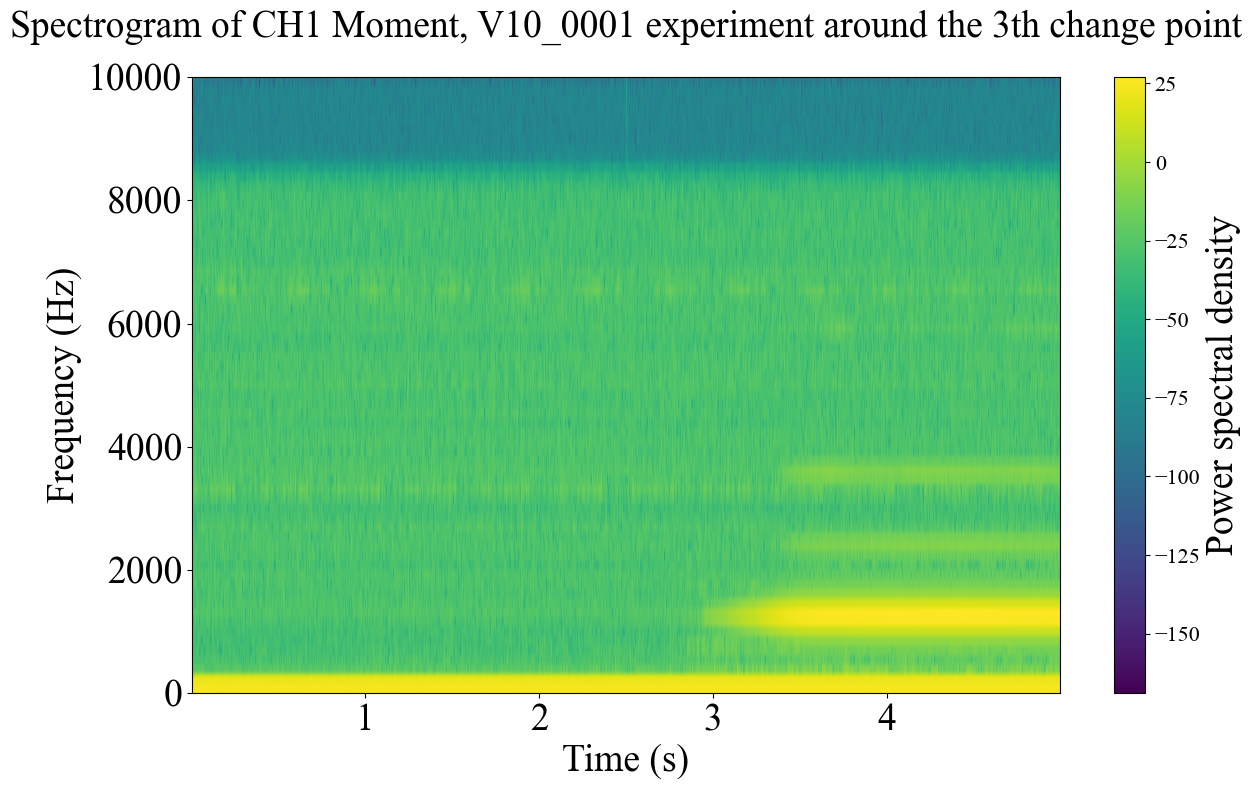

In [76]:
# Generate a time series signal
t = df['time']
x = df['vibrations']

# Compute the rolling variance of the time series
rolling_var = values.rolling(window_size).std()

# Find the time points where the rolling variance exceeds the threshold value
# anomalies = np.where(rolling_var > threshold)[0]

# Create a time series plot with the rolling variance overlaid
fig, ax = plt.subplots(figsize=(14, 8))
# ax.plot(time, values, label='Time series')
ax.plot(time, rolling_var, label=f'Rolling variance (window size={window_size})')

# # Plot vertical lines at the anomaly time points
# for anomaly in anomalies:
#     ax.axvline(x=time[anomaly], color='red')

# Add a legend and axis labels
ax.set_xlabel('Time (s)', fontsize=27)
ax.set_ylabel('Rolling std', fontsize=27)
ax.set_title('CH1 Moment, V10_0001 experiment around the 4th change point', fontsize=27)

# increase a lot the label size:
plt.tick_params(axis='both', which='major', labelsize=27)


# Plot the spectrogram with the same time frame
fig, ax = plt.subplots(figsize=(14, 8))
spec = plt.specgram(x, Fs=1/(t.iloc[1]-t.iloc[0]), NFFT=128, noverlap=64)
# Add a color bar legend
cbar = plt.colorbar(spec[3], ax=ax)
cbar.set_label('Power spectral density', fontsize=27)

# increase a lot the label size:
plt.tick_params(axis='both', which='major', labelsize=27)


# increase padding between title and figure


plt.xlabel('Time (s)', fontsize=27)
plt.ylabel('Frequency (Hz)', fontsize=27)
plt.title('Spectrogram of CH1 Moment, V10_0001 experiment around the 3th change point', fontsize=27, pad=29)
plt.xlim([t[0], t[-1]])

plt.show()

In [131]:
from matplotlib import mlab
# # plot the spectrogram:
# fig, ax = plt.subplots(figsize=(14, 8))
# # change the time s
#
# spec = ax.specgram(data_bf_af, Fs=20000, vmin=0, cmap='gray_r')
# # Add the time values for the x-axis from the time column
# # ax.set_xticks(df['time'])
# ax.set_xlabel('Time (s)')
#
# ax.set_ylabel('Frequency (Hz)')
# ax.set_title('Spectrogram of V25a_001 CH1 Moment before and after 4th change point')
#
# # Add a color bar legend
# cbar = plt.colorbar(spec[3], ax=ax)
# cbar.set_label('Power spectral density')
# Compute the power spectrum of the time series
# Compute the power spectrum of the time series

# Compute the power spectrum of the time series
Pxx, freqs, bins = mlab.specgram(df['vibrations'], Fs=20000, NFFT=1024, noverlap=512)
power = 10 * np.log10(Pxx)

# Define the eigen frequencies to find
eigen_freqs = [1191, 703, 1000]

# Find the indices in the frequency axis that correspond to the eigen frequencies
eigen_freq_idxs = [np.abs(freqs - f).argmin() for f in eigen_freqs]

# Find the peaks in the spectrogram that correspond to the eigen frequencies
peaks, _ = find_peaks(power[eigen_freq_idxs, :], distance=10)

# Convert the peak indices to time values
peak_times = bins[peaks]

# Create a spectrogram plot with the eigen frequencies highlighted
fig, ax = plt.subplots()
im = ax.pcolormesh(bins, freqs, power, cmap='viridis')
cbar = fig.colorbar(im, ax=ax)

for f in eigen_freqs:
    ax.axhline(y=f, color='red')

# Plot the peak times as vertical lines
for t in peak_times:
    ax.axvline(x=t, color='green')

# Set the axis labels and title
ax.set_xlabel('Time (s)')
ax.set_ylabel('Frequency (Hz)')
ax.set_title('Spectrogram')

# Show the plot
plt.show()

ValueError: `x` must be a 1-D array

/var/folders/kl/77dw97d55y1_kplchw9htctc0000gn/T/ipykernel_97545/1856825872.py:3: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  after_cpt = data['V25a_001']['dat']['CH1_Moment'].loc[cpt_indexes[3]:][0:50000]


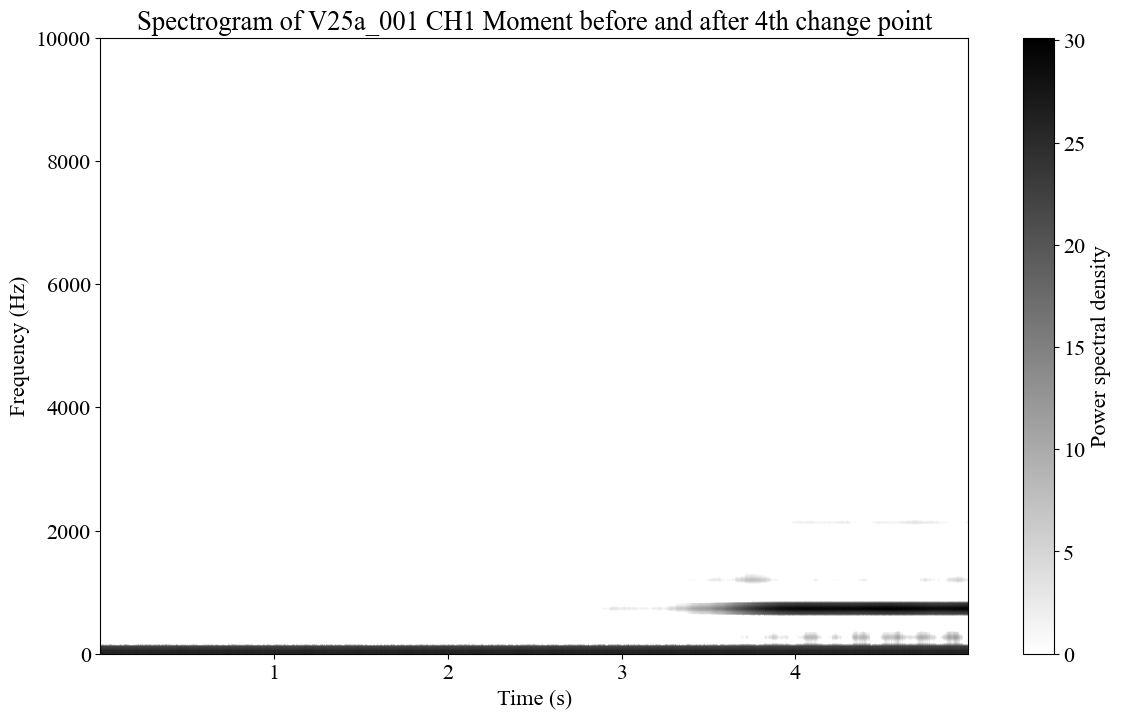

In [67]:
cpt_indexes = changepoints['V25a_001']['CH1_Moment']['indexes']
before_cpt = data['V25a_001']['dat']['CH1_Moment'].loc[:cpt_indexes[3]][-50000:]
after_cpt = data['V25a_001']['dat']['CH1_Moment'].loc[cpt_indexes[3]:][0:50000]

data_bf_af = np.concatenate((before_cpt.values.reshape(-1), after_cpt.values.reshape(-1)))

# plot the spectrogram:
fig, ax = plt.subplots(figsize=(14, 8))
spec = ax.specgram(data_bf_af, Fs=20000, vmin=0, cmap='gray_r')
ax.set_xlabel('Time (s)')
ax.set_ylabel('Frequency (Hz)')
ax.set_title('Spectrogram of V25a_001 CH1 Moment before and after 4th change point')

# Add a color bar legend
cbar = plt.colorbar(spec[3], ax=ax)
cbar.set_label('Power spectral density')

### Generate the Periodogram for the V24 CH1 Moment before and after 4th change point

In [75]:
datasets_v = [
            'V24_0001',
            'V25a_001',
            'V6_00001',
            'V2_00001',
            'V10_0001',
            'V20_0001',
            'V17_0001',
        ]
selected_sensors = ["CH2_Kraft"]
changepoints_v = generate_changepoints(data, selected_sensors)

/Users/aymanehachcham/miniconda3/envs/tad/lib/python3.10/site-packages/ruptures/costs/costnormal.py:27: UserWarning: New behaviour in v1.1.5: a small bias is added to the covariance matrix to cope with truly constant segments (see PR#198).
  warnings.warn(


In [76]:
selected_datasets = {
  'V24_0001':3,
  'V25a_001':3,
  'V6_00001':3,
  'V2_00001':3,
  'V10_0001':3,
    'V20_0001':3,
    'V17_0001':3,
}

sensor = "CH2_Kraft"

eigen_freqs = generate_eigen_freqs(data, changepoints_v, sensor, selected_datasets, 5000)

/Users/aymanehachcham/Documents/TU Dortmund/Case Studies 2023/Case-Studies---Project-2/code/eigen_freq.py:15: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  after = sensor_data.loc[breaking_points[cpt]:][0:20000]


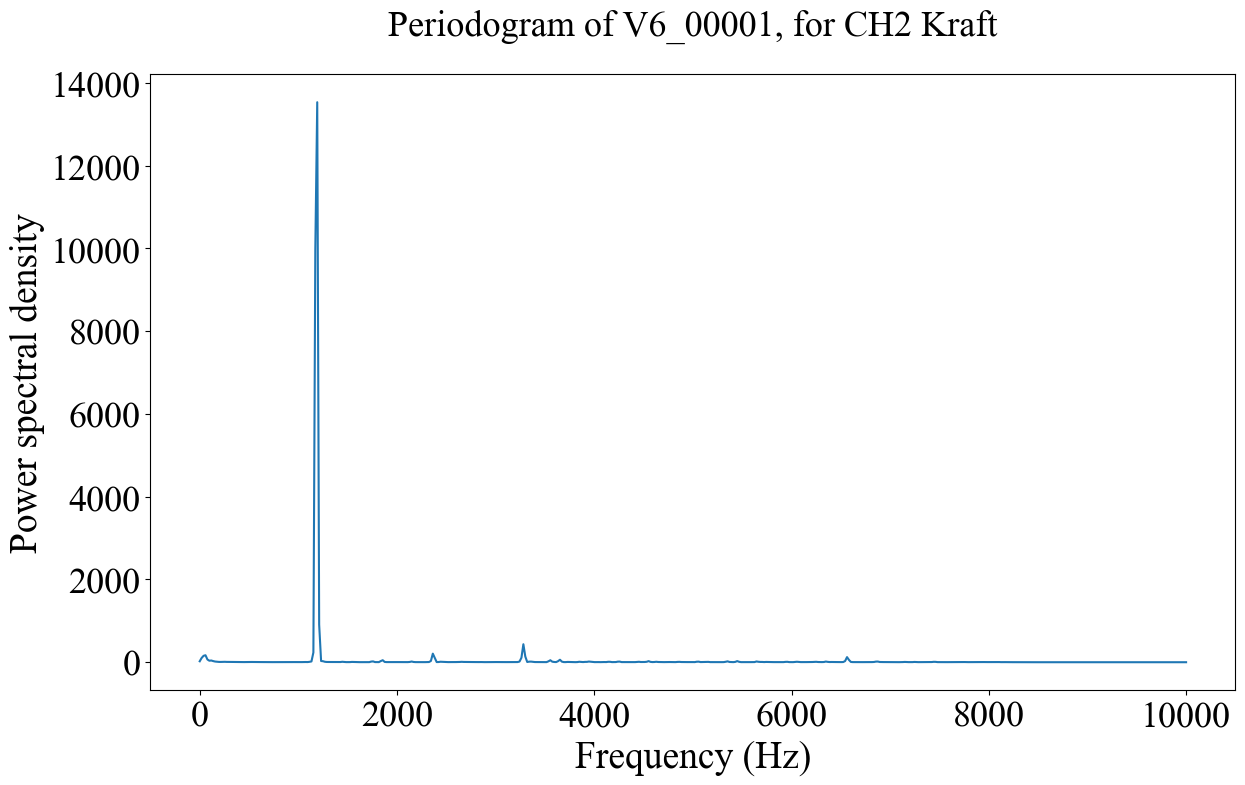

In [46]:
eigen_v24 = eigen_freqs['V24_0001']['CH2_Kraft']['freq']
eigen_v25 = eigen_freqs['V25a_001']['CH2_Kraft']['freq']
eigen_v6 = eigen_freqs['V6_00001']['CH2_Kraft']['freq']
psd_v24 = eigen_freqs['V24_0001']['CH2_Kraft']['psd']
psd_v25 = eigen_freqs['V25a_001']['CH2_Kraft']['psd']
psd_v6 = eigen_freqs['V6_00001']['CH2_Kraft']['psd']

# plot a periodogram for each dataset:
plt.figure(figsize=(14, 8))
# plt.plot(eigen_v24, psd_v24, label='V24_0001')
# plt.plot(eigen_v25, psd_v25, label='V25a_001')
plt.plot(eigen_v6, psd_v6, label='V6_00001')
plt.xlabel('Frequency (Hz)', fontsize=27)
plt.ylabel('Power spectral density', fontsize=27)
plt.title('Periodogram of V6_00001, for CH2 Kraft', fontsize=26, pad=28)

# increase the size of the labels
plt.tick_params(axis='both', which='major', labelsize=26)

plt.show()

In [85]:
# create a dataframe with frequencies and psd:
v25 = pd.DataFrame({'freq': eigen_freqs['V25a_001']['CH2_Kraft']['freq'], 'psd': eigen_freqs['V25a_001']['CH2_Kraft']['psd']})
v24 = pd.DataFrame({'freq': eigen_freqs['V24_0001']['CH2_Kraft']['freq'], 'psd': eigen_freqs['V24_0001']['CH2_Kraft']['psd']})
v6 = pd.DataFrame({'freq': eigen_freqs['V6_00001']['CH2_Kraft']['freq'], 'psd': eigen_freqs['V6_00001']['CH2_Kraft']['psd']})
v2 = pd.DataFrame({'freq': eigen_freqs['V2_00001']['CH2_Kraft']['freq'], 'psd': eigen_freqs['V2_00001']['CH2_Kraft']['psd']})
v10 = pd.DataFrame({'freq': eigen_freqs['V10_0001']['CH2_Kraft']['freq'], 'psd': eigen_freqs['V10_0001']['CH2_Kraft']['psd']})
v20 = pd.DataFrame({'freq': eigen_freqs['V20_0001']['CH2_Kraft']['freq'], 'psd': eigen_freqs['V20_0001']['CH2_Kraft']['psd']})
v17 = pd.DataFrame({'freq': eigen_freqs['V17_0001']['CH2_Kraft']['freq'], 'psd': eigen_freqs['V17_0001']['CH2_Kraft']['psd']})


# Find the 5 most important frequencies for each dataset:
# v25.sort_values(by=['psd'], ascending=False).head(5)
# v24.sort_values(by=['psd'], ascending=False).head(5)
# v6.sort_values(by=['psd'], ascending=False).head(5)
# v2.sort_values(by=['psd'], ascending=False).head(5)
# v10.sort_values(by=['psd'], ascending=False).head(5)
# v20.sort_values(by=['psd'], ascending=False).head(5)
v17.sort_values(by=['psd'], ascending=False).head(5)


,freq,psd
60,1171.87500,12924.626027
61,1191.40625,11682.671350
59,1152.34375,697.809454
168,3281.25000,590.376343
62,1210.93750,474.458597


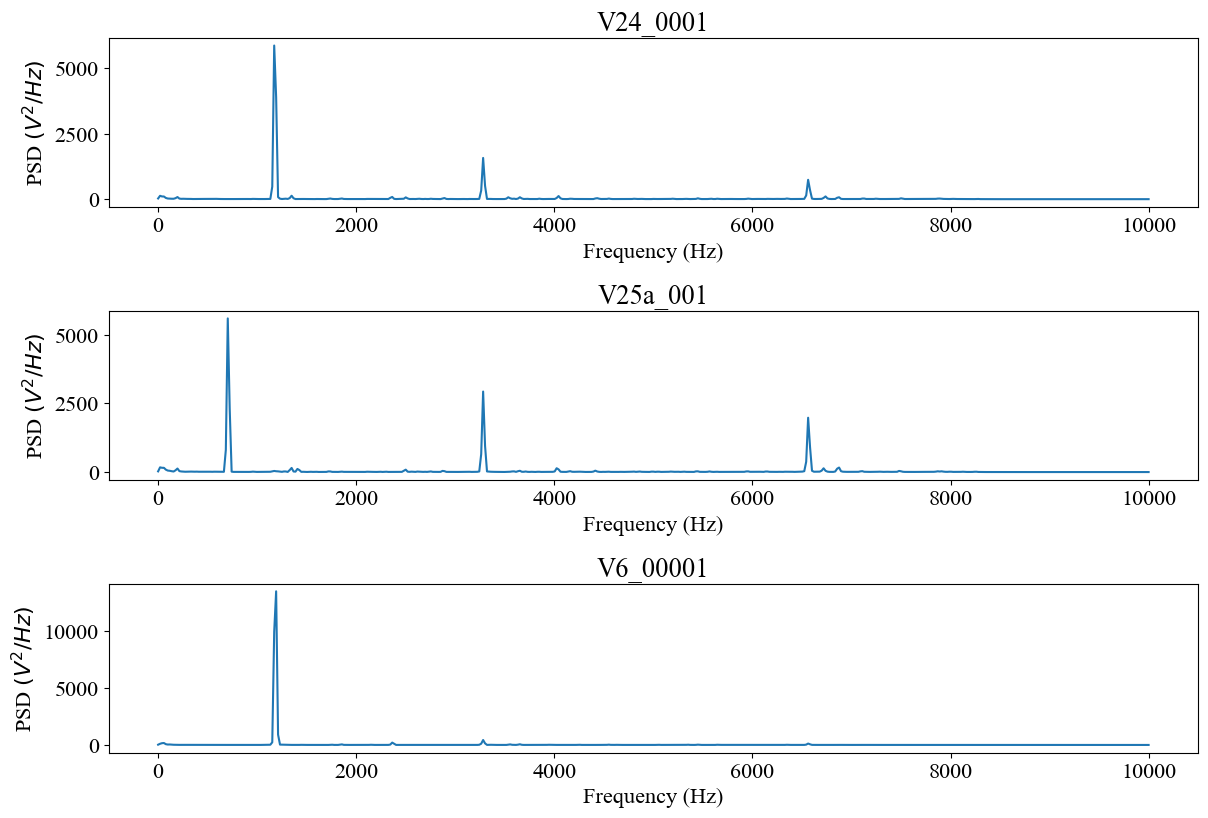

In [48]:
plot_eigen_freq(list(selected_datasets.keys()), eigen_freqs, sensor, (12, 8), "V_datasets_eig_freq_" + sensor + ".pdf")

In [44]:
max_freq = max(eigen_freqs['V25a_001']['CH1_Moment']['psd'])

# create a dataframe with frequencies and psd:
df = pd.DataFrame({'freq': eigen_freqs['V25a_001']['CH1_Moment']['freq'], 'psd': eigen_freqs['V25a_001']['CH1_Moment']['psd']})

# take the freq with the max psd:
df[df['psd'] == max_freq]['freq'].values[0]

1171.875